# Simulations For Lower-Extremity Injuries Prediction Models

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### System Dynamics Model

##### Euler's Method

Euler's numerical method is given by the equation: $$S(t_i+1)=S(t_i)+hF(t_i,S(t_i))$$

In [2]:
def euler(f, t, s0, h):
        s = np.zeros(len(t))
        s[0] = s0

        for i in range(0, len(t) - 1):
                s[i + 1] = s[i] + h * f(t[i], s[i])

        return s

##### Second Order Runge-Kutta Method

The second order Runge-Kutta numerical method is given by the equations:
$$k_1=F(t_i,S(t_i))$$
$$k_2=F(t_i+h,S(t_i)+k_1)$$
$$S(t_i+1)=S(t_i)+\dfrac{1}{2}(k_1+k_2) \times h$$

In [3]:
def runge_kutta_2(f, t, s0, h):
    s = np.zeros(len(t))
    s[0] = s0

    for i in range(0, len(t) - 1):
        k1 = h * f(t[i], s[i])
        k2 = h * f(t[i] + h, s[i] + k1)
        s[i + 1] = s[i] + (k1 + k2) / 2

    return s

##### Simulations

Model Formulation

In [4]:
def dsdt(t, s):
    #* EXAMPLE
    return np.exp(-t)

# f = lambda t, s: np.exp(-t) # ODE

# def dydt(x, y):
#     return x - y

Initial Conditions & Time Parameters

In [5]:
# Step size
h = 0.1
# Numerical grid
t = np.arange(0, 1 + h, h)
# Initial Condition
s0 = -1

##### Using Euler's Method

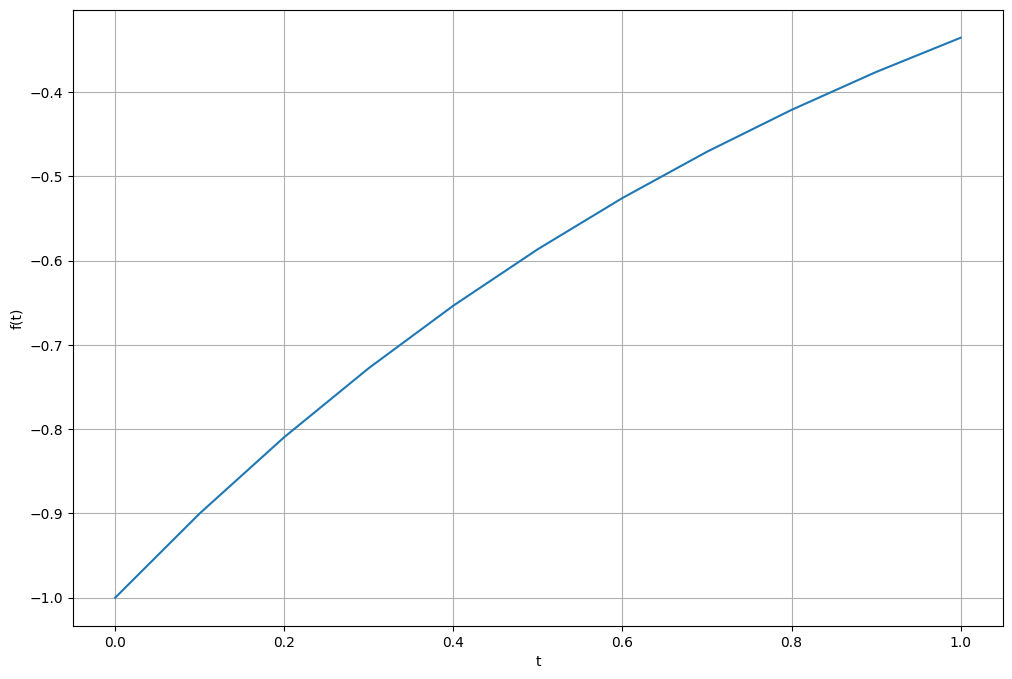

In [6]:
# Explicit Euler Method
s = euler(dsdt, t, s0, h)

plt.figure(figsize = (12, 8))
plt.plot(t, s, label='Approximate')
# plt.plot(t, -np.exp(-t), 'g', label='Exact')
# plt.title('Approximate and Exact Solution \
# for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
# plt.legend(loc='lower right')
plt.show()

##### Using The Second Order Runge-Kutta Method

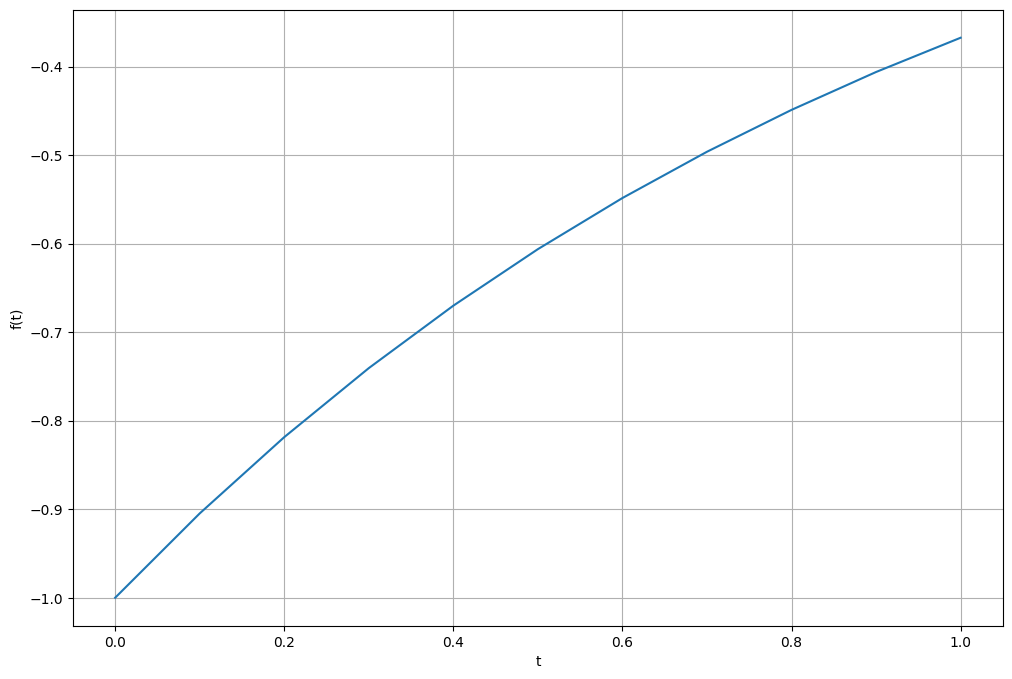

In [7]:
# Explicit Euler Method
s = runge_kutta_2(dsdt, t, s0, h)

plt.figure(figsize = (12, 8))
plt.plot(t, s, label='Approximate')
# plt.plot(t, -np.exp(-t), 'g', label='Exact')
# plt.title('Approximate and Exact Solution \
# for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
# plt.legend(loc='lower right')
plt.show()

### Regression Model

##### Logistic Regression Model
$$\hat{y} = \frac{1}{1 + e^{-X\theta}}$$

In [11]:
def logistic_regression(X, theta):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

##### Compute Gradient
$$\nabla_\theta J(\theta) = \frac{1}{m} X^T(\hat{y} - y)$$

In [12]:
def compute_gradient_logistic(X, y, theta):
    predictions = logistic_regression(X, theta)
    error = predictions - y
    gradient = np.dot(X.T, error) / len(y)
    return gradient

##### Compute Loss
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$$

In [13]:
def logistic_loss(X, y, theta):
    predictions = logistic_regression(X, theta)
    return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

##### Gradient Descent using Euler Method

In [14]:
def gradient_descent_euler_logistic(X, y, theta, learning_rate, iterations):
    history = []  # to store the history of the cost function
    for _ in range(iterations):
        grad = compute_gradient_logistic(X, y, theta)
        theta = theta - learning_rate * grad
        history.append(logistic_loss(X, y, theta))
    return theta, history

##### Gradient Descent using Runge-Kutta 2nd Order Method

In [15]:
def gradient_descent_runge_kutta_2_logistic(X, y, theta, learning_rate, iterations):
    history = []  # to store the history of the cost function
    for _ in range(iterations):
        k1 = compute_gradient_logistic(X, y, theta)
        k2 = compute_gradient_logistic(X, y, theta - learning_rate * k1)
        theta = theta - (learning_rate / 2) * (k1 + k2)
        history.append(logistic_loss(X, y, theta))
    return theta, history

##### Simulation

Accuracy (Euler Method): 0.95
Accuracy (Runge-Kutta 2nd Order Method): 0.95


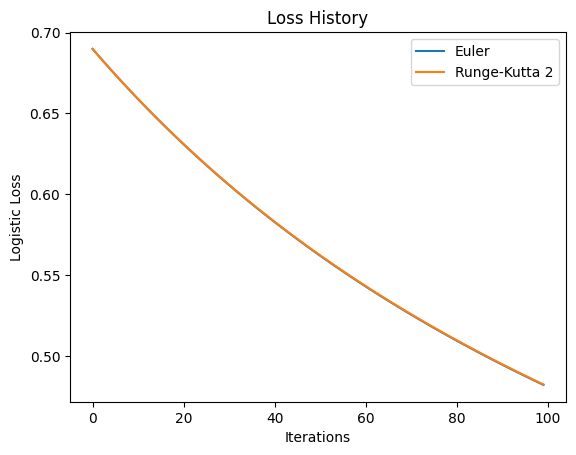

In [22]:
# Generate a classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add intercept
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initial parameters
theta_initial = np.zeros(X_train.shape[1])

# Train the model using Euler and Runge-Kutta methods
theta_euler, history_euler = gradient_descent_euler_logistic(X_train, y_train, theta_initial, 0.01, 100)
theta_rk2, history_rk2 = gradient_descent_runge_kutta_2_logistic(X_train, y_train, theta_initial, 0.01, 100)

# Make predictions
y_pred_euler = logistic_regression(X_test, theta_euler) >= 0.5
y_pred_rk2 = logistic_regression(X_test, theta_rk2) >= 0.5

# Calculate accuracy
accuracy_euler = accuracy_score(y_test, y_pred_euler)
accuracy_rk2 = accuracy_score(y_test, y_pred_rk2)

print("Accuracy (Euler Method):", accuracy_euler)
print("Accuracy (Runge-Kutta 2nd Order Method):", accuracy_rk2)

# Plotting the loss history
plt.plot(history_euler, label='Euler')
plt.plot(history_rk2, label='Runge-Kutta 2')
plt.xlabel('Iterations')
plt.ylabel('Logistic Loss')
plt.title('Loss History')
plt.legend()
plt.show()